# UNSUPERVISED LEARNING

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.species.value_counts()   # her bir tür için sayılarına bakalım

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
df.info()

# null value yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Data setindeki tüm değerler cm cinsinden verilmiş

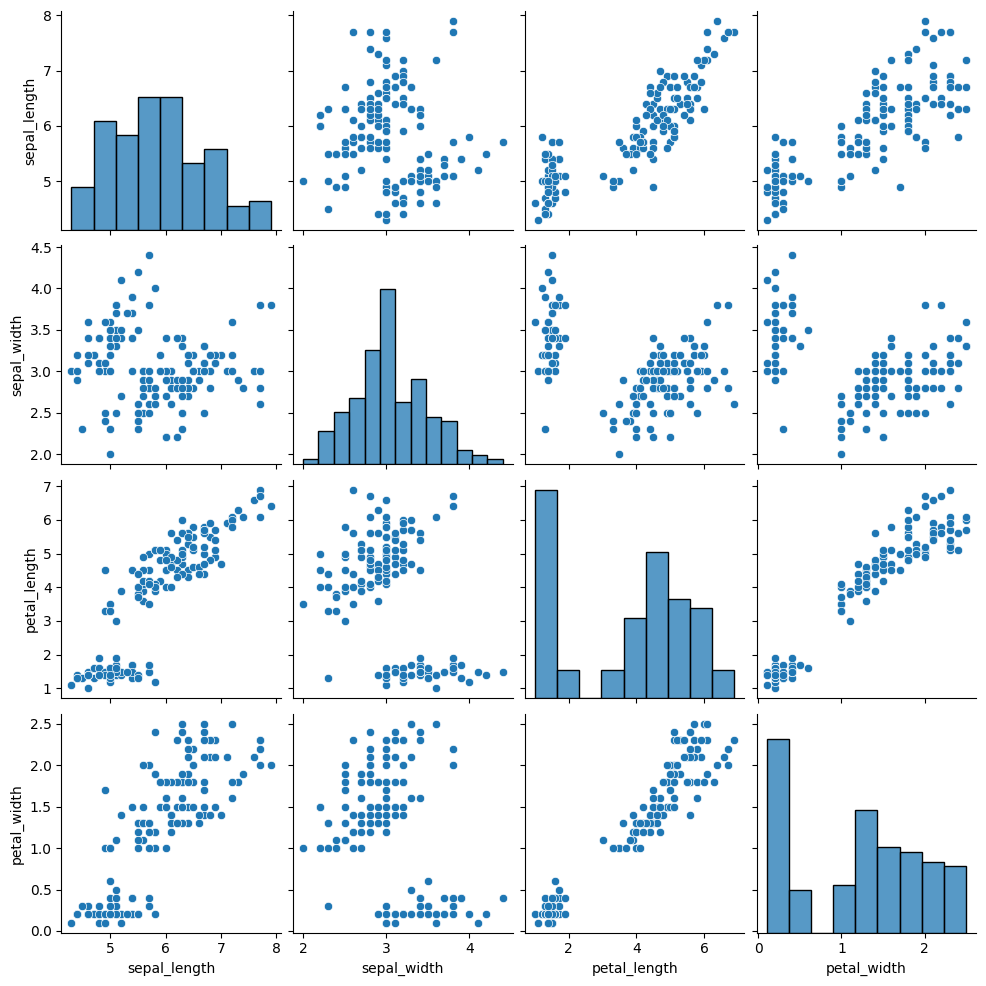

In [7]:
sns.pairplot(df)
plt.show();

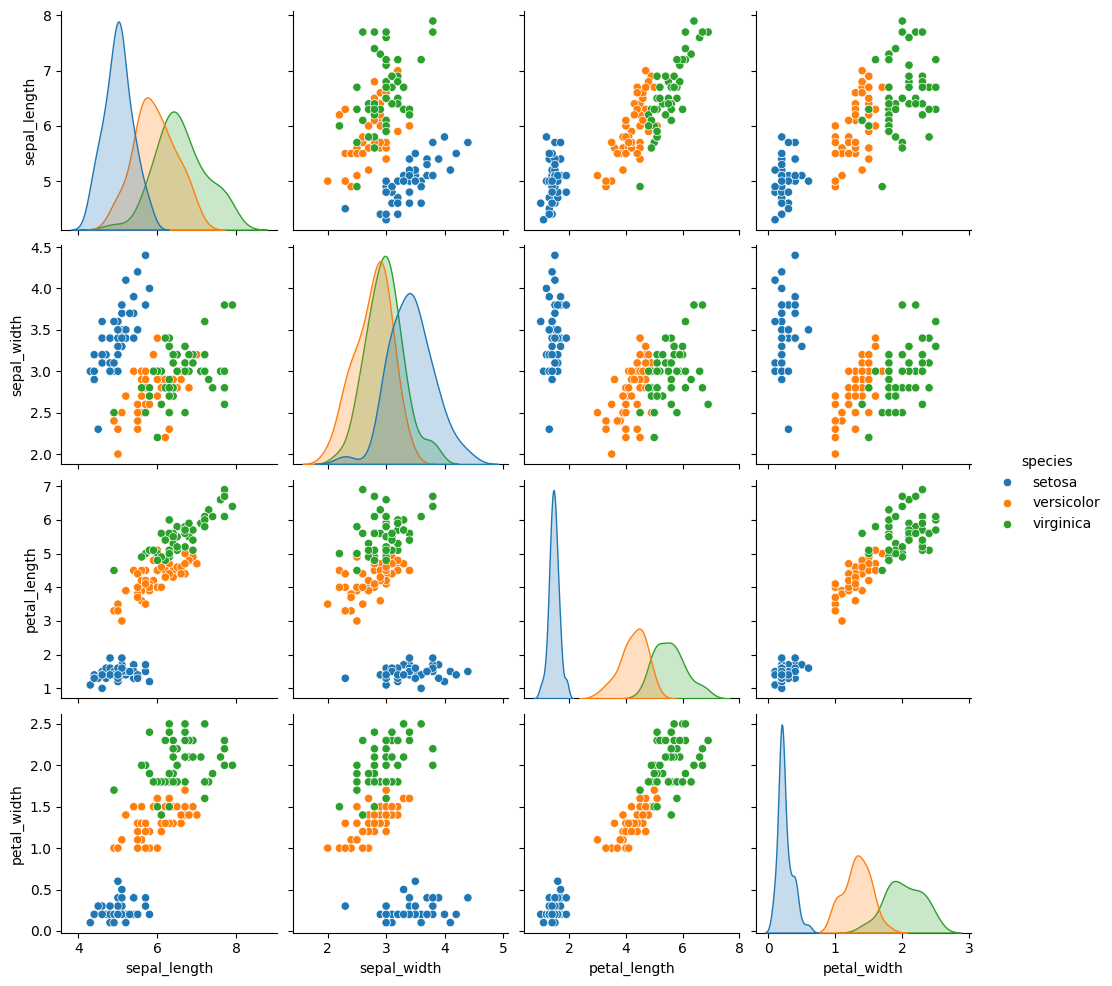

In [8]:
sns.pairplot(data=df, hue='species')
plt.show();

## Scaling Data

In [9]:
# Eğer Scale yapsaydık alttaki gibi olabilirdi: 

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() 

# Iris_scaled = scaler.fit_transform(Iris)   # fit_transform

NOT-1: bu NB' da scale yapılmadan devam edildi. Çünkü scale yapılarak elde edilen sonuçların daha kötü olduğu izlendi. Feature lar cm cinsinden olduğu için boylke bir sonuç alınmış olaiblir

NOT-2: burada train ve test split yapmayacağız. doğrudan X'i oluşturacağız. Target variable olmadığı için datanın hepsini X' atayacağız

## K_Means Clustering

In [11]:
Z =df.copy()     # orjinalini muhafaz edip daha sonra kullanma ihtimali nedeniyle saklayalım

In [12]:
Z.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
X = Z.drop("species", axis=1)   # species feature'ı düşürelim

In [14]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
X.shape

(150, 4)

In [16]:
from sklearn.cluster import KMeans

In [17]:
K_means_model = KMeans(n_clusters=5, random_state=42)

# n_clusters: Küme sayısı demektir

In [18]:
K_means_model.fit_predict(X)   # burada hem fit hem de predict bir arada kullanılıyor

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

**Sonuç**: fit_predict metodu, her veri noktasının ait olduğu kümenin etiketini içeren bir dizi döndürür. Bu etiketler genellikle 0'dan başlayarak "n_clusters-1'"e kadar olan tam sayılardır.

In [19]:
# fit ve predict i ayrı ayrı kullanırsak:

K_means_model.fit(X)   # eger fit i ayrı verirsek hem bu satır hem alttaki satır yazılacak

KMeans(n_clusters=5, random_state=42)

In [20]:
K_means_model.labels_ 

# Fit ayrı yapılınca bu satır predict olarak çalışmış olacak

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 0, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 0, 4, 4, 4, 3, 3, 0, 4, 0, 3, 0, 4, 3, 0, 0, 4, 3, 3, 3,
       4, 0, 0, 3, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

In [21]:
X["Classes"] = K_means_model.labels_    # yukardaki label'ları Classes' a atayalım
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


## Hopkins test

In [22]:
# Hatalı kütüphane !!

# pip install pyclustertend  
#  from pyclustertend import hopkins 

In [23]:
X = X.drop("Classes", axis=1)  # yukarda ornek olarak tahmin edilen degerleri yine devre dışı bıraktık
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
# alttaki kod blogu manuel olarak Hopkins test skorunu hesaplayacak
# 0' a yakın olması daha iyi kümeleme göstergesi olacaktır

In [25]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [26]:
hopkins(X,X.shape[0])  # büyük datalarda %10-20 gibi alınaiblir (örnek olarak 150 bimlik datada)

0.16761219357997525

In [27]:
hopkins(X, 60) # 60 adet gözlem için baktım skorlar yakın. Her çalışmada değişir ama çok büyük fark çıkmaz

0.17413794812981764

# Choosing The Optimal Number of Clusters

## Elbow metod

In [28]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" (mesafelerin karelerinin toplamı)

K = range(2,10)   # minimum 2 max 10 küme olacak

for k in K:                                          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

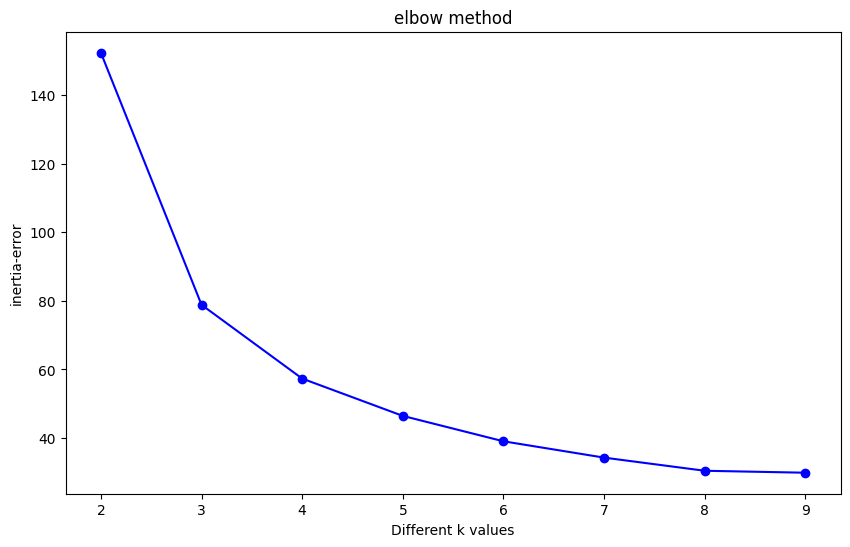

In [29]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [30]:
ssd    # yukarda hesaplanmıştı..  sum of sqaured distance

[152.34795176035792,
 78.85566582597731,
 57.35088021295475,
 46.47223015873016,
 39.066035353535355,
 34.3058152958153,
 30.476222943722945,
 29.906246659137963]

In [31]:
pd.Series(ssd).diff()

# ilk satır 0 çünkü "152 - hiçbirşey"
# en büyük düşüşü arıyoruz

0          NaN
1   -73.492286
2   -21.504786
3   -10.878650
4    -7.406195
5    -4.760220
6    -3.829592
7    -0.569976
dtype: float64

In [32]:
# yukardaki değerleri dataframe e dönüştürelim

df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,73.492286
3,21.504786
4,10.878650
5,7.406195
6,4.760220
7,3.829592
8,0.569976


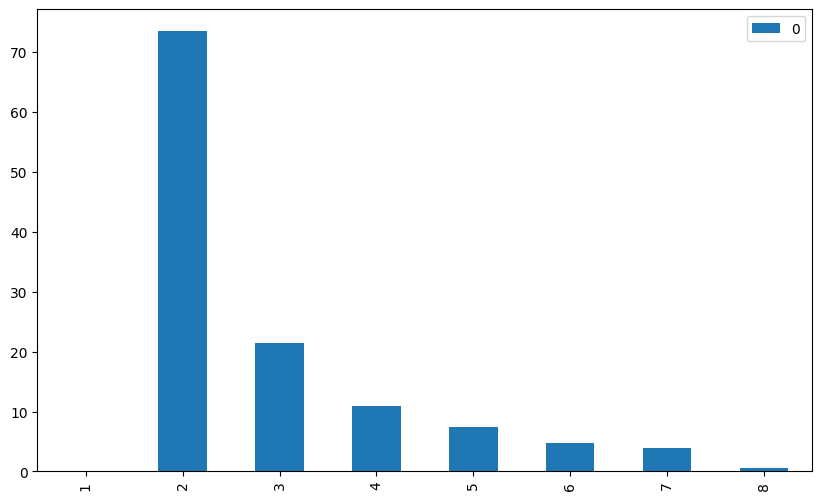

In [33]:
df_diff.plot(kind='bar');    # alttaki grafiğe göre en sert düşüş noktasını görelim


## Second Method - Yellowbrick (n_cluster selection)

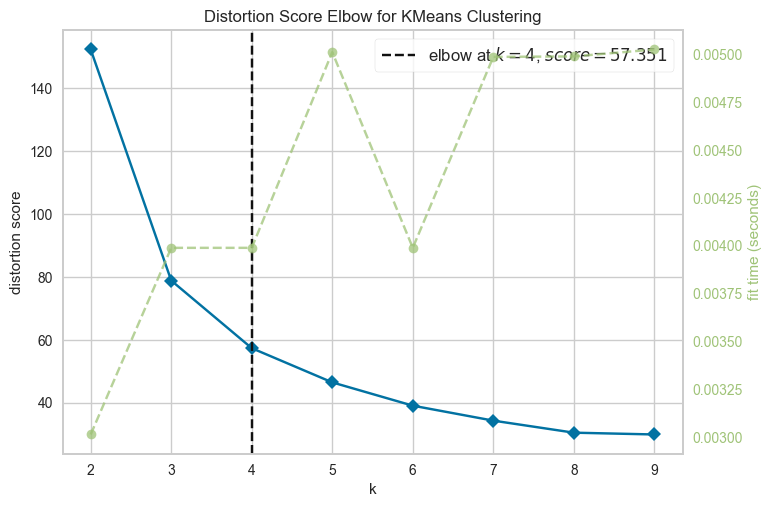

In [35]:
from yellowbrick.cluster import KElbowVisualizer   # yellowbrick ile elbow daki grafikte seçim yapar

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10)) # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.

visualizer.fit(X)        # Fit the data to the visualizer.. inertia metoduna ggöre gösterir
visualizer.show();

## Silhouette analysis

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(X, K_means_model.labels_)   # yukarda default olarak n_cluster =5 seçilmişti

0.4930804067193529

In [38]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117465
For n_clusters=3, the silhouette score is 0.5511916046195927
For n_clusters=4, the silhouette score is 0.49764331793219296
For n_clusters=5, the silhouette score is 0.4930804067193529
For n_clusters=6, the silhouette score is 0.36784649847122536
For n_clusters=7, the silhouette score is 0.3542978877198859
For n_clusters=8, the silhouette score is 0.34467972180562056


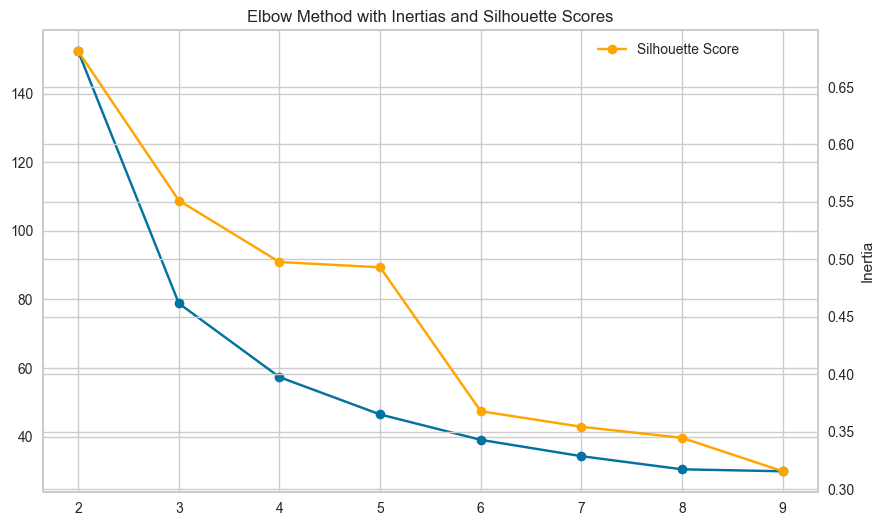

In [39]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

## Silhouette Visualizer

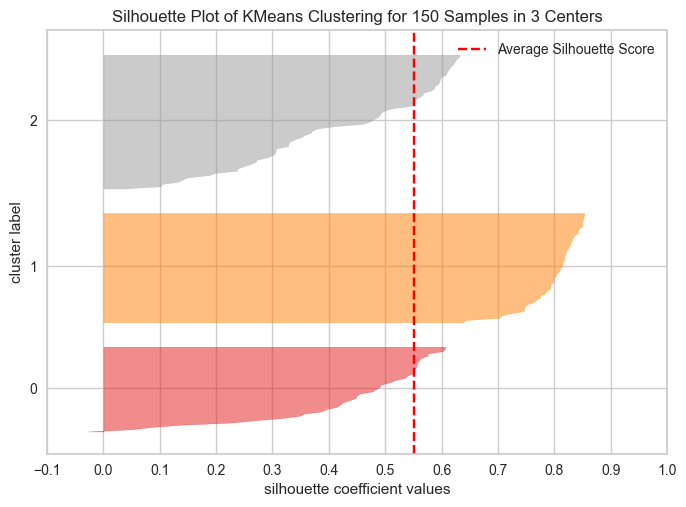

In [40]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)  # kmeans = 3 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

In [41]:
# n_cluster olarak 3 sayısına karar verdim ve onunla yürüyeceğim

In [42]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [43]:
model.labels_    # n_cluster= 3 için yapılan atama (predict) sonuçları

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [44]:
clusters = model.labels_

In [45]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
X["predicted_clusters"] = clusters

In [47]:
X   # burada predicted olan feature içinde tahmin sonuçları görülüyor

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


- Eğer Uzman görüşüne sahip olmasa idik, Normal şartlarda NB burada bitmiş idi..
- bundan sonraki aşama uzman görüşünü almak olmalıdır.

Şimdi senaryo gereği uzman görüşü olarak iris data setinin species feature 'ı çağırıyorum..

In [48]:
# orjinal data setini çağıralım

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
df["predicted_clusters"] = clusters

In [50]:
df.head()   # species feature'ı bize uzman gorusunu temsil ediyor

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [51]:
# Yaptıgımız kumelenin ne kadar dogru oldugunu pandas daki crosstab fonksiyonu ile görelım
# crosstab : bir veri çerçevesi (df) içindeki iki sütun arasında bir çapraz tablo (contingency table) oluşturur.

In [52]:
ct = pd.crosstab(df.predicted_clusters, df.species) # ayrılan class'lara göre tahmin ve labels karşılaştırıyor.
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,3,36
1,50,0,0
2,0,47,14


In [53]:
# 2. clusters 47 versicolor ve 14 virginica tahmin etmiş
# 1.   ''     50 setosa  tahmin etmiş 0 hata
# 0.   ''     36 virginica  ve 3 versicolor tahmin etmiş
# toplamda 17 hata yapmış

## Adjust Rand Score

In [54]:
from sklearn.metrics import adjusted_rand_score

In [55]:
df_end = df
df_end

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [56]:
# adjusted_rand_score(labels_true, labels_pred)

# True_label lar uzman kişinin kümeleme sonuçlarını, pred_label lar bizim yaptıgımız kumelemeyi, gösterir

In [57]:
adjusted_rand_score(df_end.species, df_end.predicted_clusters)

0.7163421126838476

## Visualization Clusters

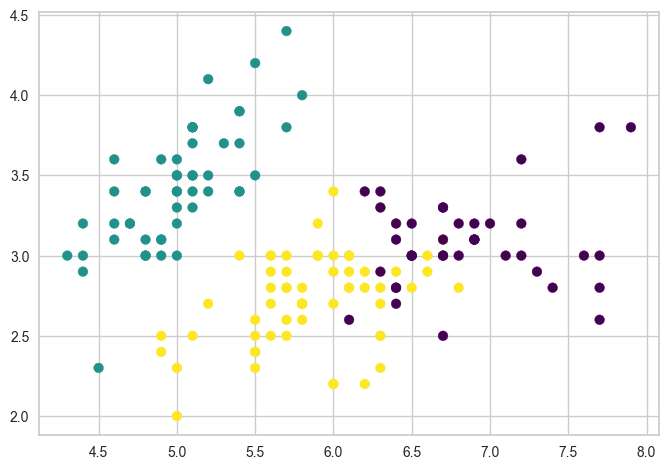

In [58]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis");

# df["sepal_length"] : X ekseni değerleri.. çiçeklerin sepallerinin (çanak yapraklarının) uzunluklarını içerir.

# df["sepal_width"]: y ekseni değerleri ..sepal_width adlı sütununu temsil eder, sepallerin genişliklerini içerir.

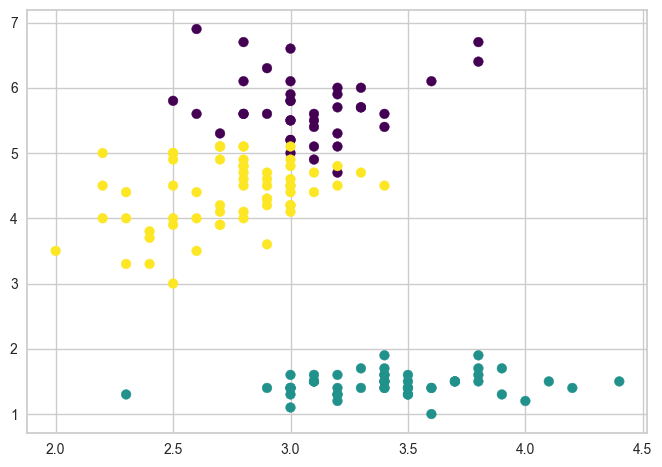

In [59]:
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis");
 # farklı bir eksen feature ları ,ile görelim

In [60]:
# her bir feature için centroid koordinatlarını bulalım..  Centroid lerin x,y koordinatları

centers = model.cluster_centers_
centers

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [61]:
centers[:,0] # centers of sepal_length feature... Centroid lerin X koordinatları

array([6.85384615, 5.006     , 5.88360656])

In [62]:
centers[:,1] # centers of sepal_width feature ...  Centroid lerin Y koordinatları

array([3.07692308, 3.428     , 2.74098361])

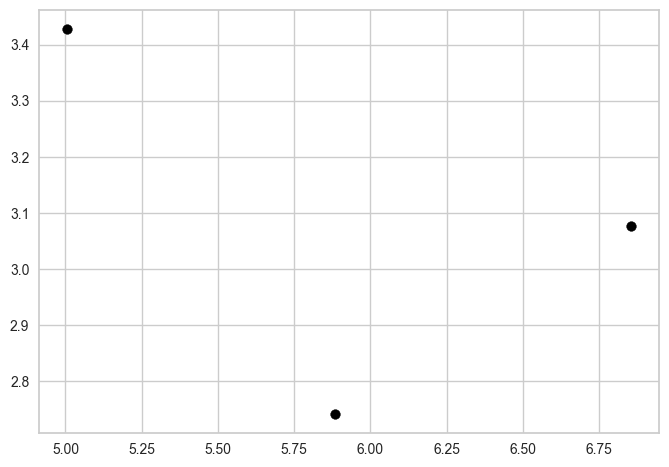

In [63]:
plt.scatter(centers[:,0], centers[:,1], c = "black");

# merkez noktalarını görelim çizimde

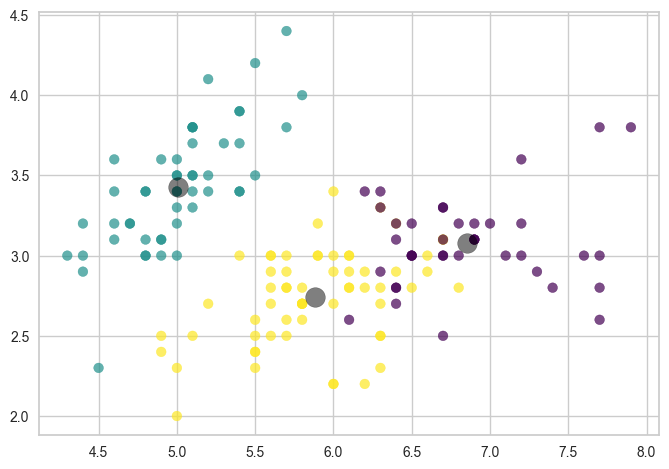

In [64]:
# üstteki grafikte görülen centroid noktalarına bizim data setimizdeki data point'leri ekleyelim

plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); 

## Remodeling according to discriminating features

In [ ]:
# Feature Engineering kapsamında modelimizi daha nasıl geliştirebiliriz ?  
#ayırt edici özelliklere göre yeniden modelleme yapalım. 17 adet hatalı kumelemeyi azaltmak için bu denemeyi yapıyorum

In [65]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [66]:
df.iloc[:, [0,1,2,3,5]].head()   # species ı devre dışı bırakalım

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [67]:
# tüm feature' larımın tahmin ettiğim değerlere göre ortalamalarını alalım

clus_pred = df.iloc[:, [0,1,2,3,5]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,6.853846,5.006,5.883607
sepal_width,3.076923,3.428,2.740984
petal_length,5.715385,1.462,4.388525
petal_width,2.053846,0.246,1.434426


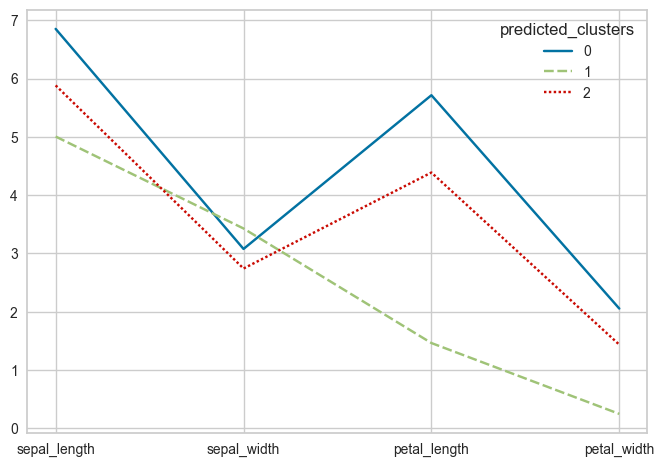

In [68]:
sns.lineplot(data = clus_pred);

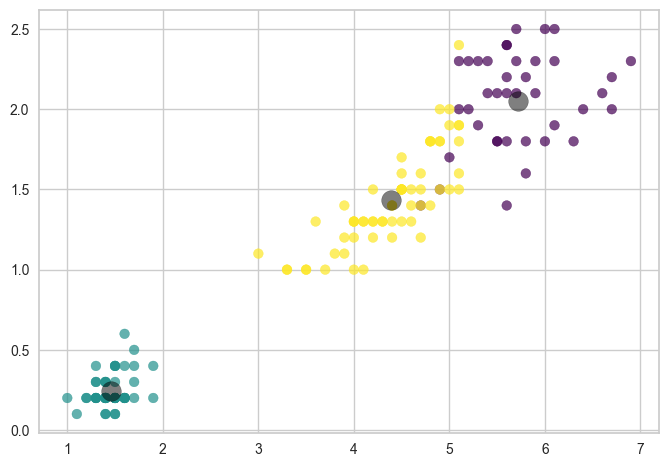

In [69]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

**NOT**: bu iki fetaure (petal_length ve petal_width) üzerinden modeli yeniden kurup birde bu şekilde deneme yapacağım

In [70]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Hopkins test

In [71]:
# yukarda kullandıgımız hopkins def function u kullanalım

hopkins(X2, X2.shape[0]) 

0.09748956397523932

## Elbow metod


In [72]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

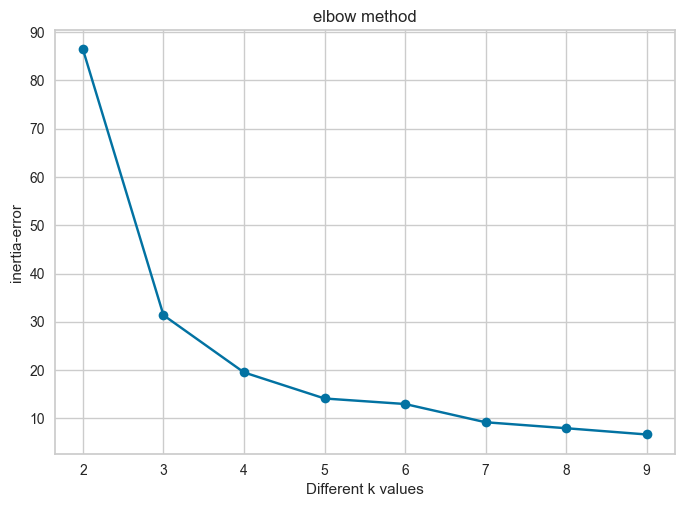

In [73]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [74]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,55.018861
3,11.841625
4,5.398840
5,1.143115
6,3.775674
7,1.236750
8,1.295116


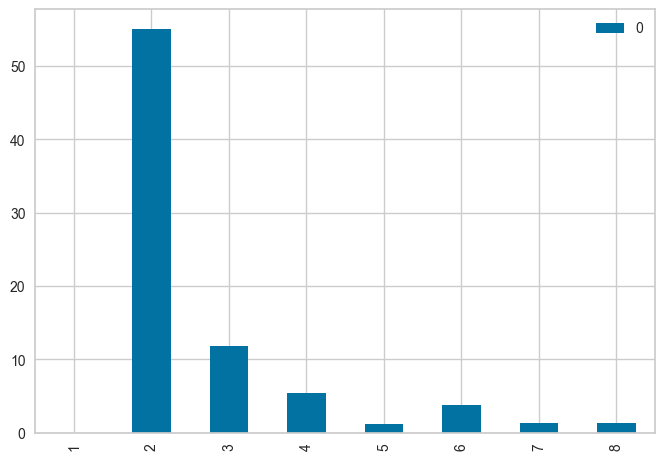

In [75]:
df_diff.plot(kind='bar');

## Yellowbrick bakışı

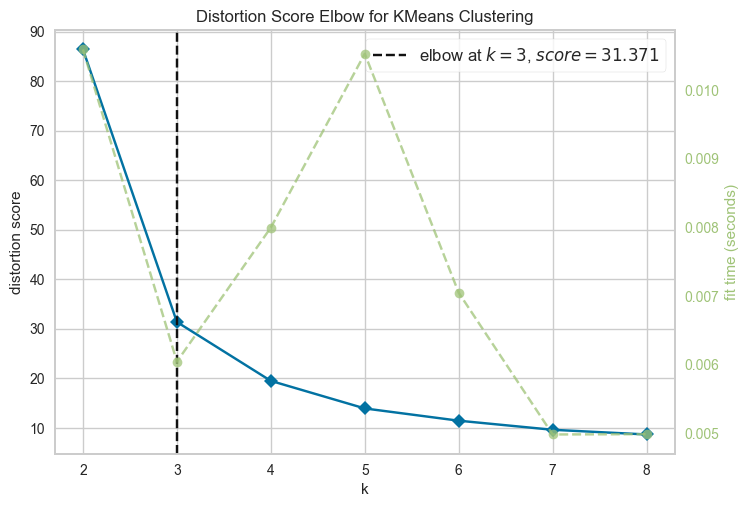

In [76]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [77]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.5617282184908394
For n_clusters=7, the silhouette score is 0.5536884823537347
For n_clusters=8, the silhouette score is 0.5245973293048308


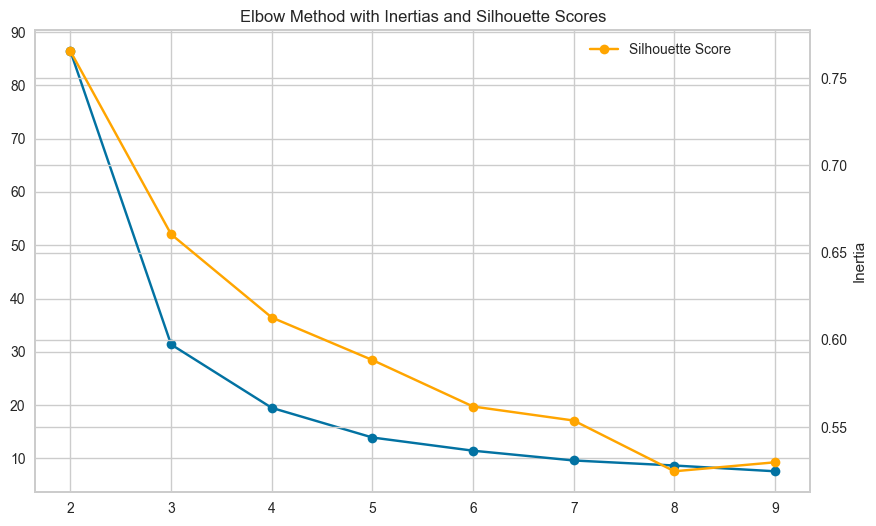

In [79]:
# Elbow + Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X2)
    silhouette = silhouette_score(X2, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
    
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))

# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

## Silhouette Visualizer

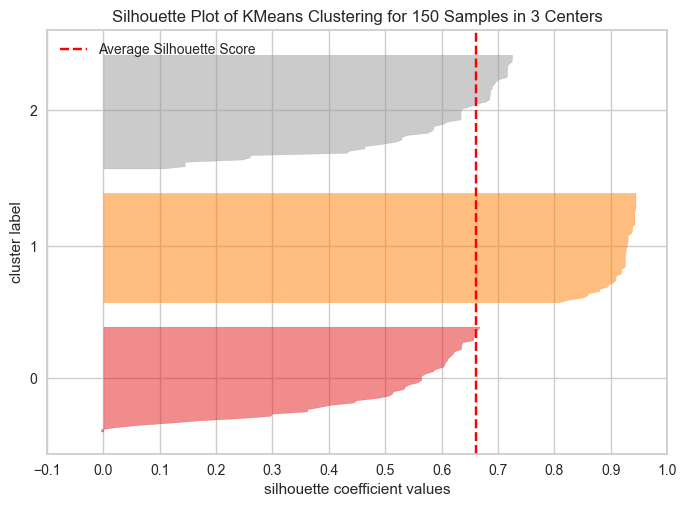

In [78]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

In [80]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
X2["species"] = df["species"]
X2

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [82]:
X2["predicted_clusters"] = final_model.labels_
X2

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


## Adjust Rand Score

In [83]:
adjusted_rand_score(X2.species, X2.predicted_clusters)

0.8856970310281228

## Compare results

In [84]:
# ct for 2 features
pd.crosstab(X2.predicted_clusters, X2.species)

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


Yeni yaklaşım sayesinde hatalı tahmin sayısını 17'den 6 ya indirmiş olduk. 

Eski CT skorlarımız altta görüldüğü gibi (17 adet)
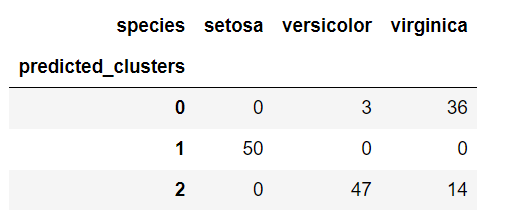

## Prediction cluster of new data

In [86]:
new_data = [[1.7, 0.2]]

In [87]:
final_model.predict(new_data)

array([1])

## Summary 

Bir segmentasyon modelinin başarısı aşağıdaki yönlerde özetlenebilir:

İşletmenin hedefleri ile uyum,

Tanımlanan boyutların netliği

Zamanlamanın dikkatli bir şekilde değerlendirilmesi

Kümelerin iş hedeflerine uyarlanmasında esneklik

Zaman içinde istikrar

Sonuçta başarılı segmentasyon, farklı müşteri profillerini anlamak ve onlarla etkileşime geçmek için kapsamlı ve etkili bir çerçeve oluşturur.

https://towardsdatascience.com/customer-segmentation-more-than-clustering-a7226a9ff138

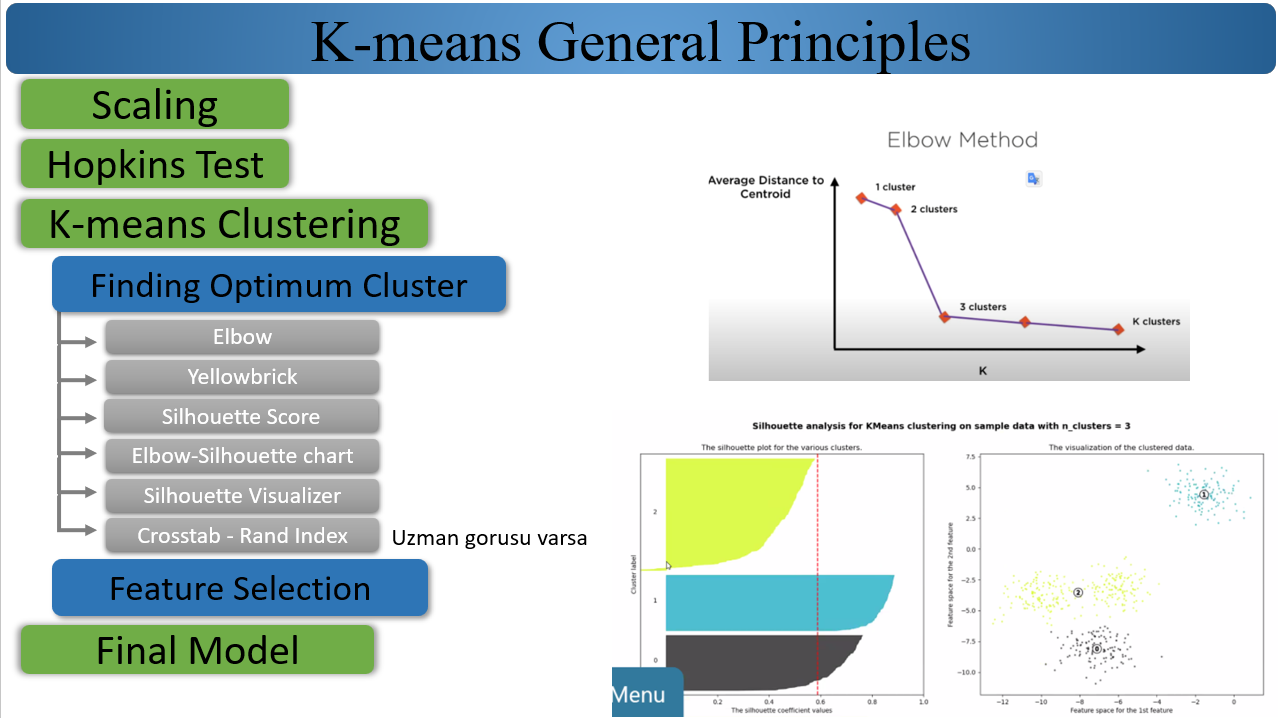